# **Análisis del Mercado Inmobiliario de Dubai para DAM Capital**
---

In [15]:
# Análisis de Mercado Inmobiliario de Dubái para DAM Capital
# Autor: Alex Fau Ridao

# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Link para datos externos (si fuera necesario): 
# https://dubailand.gov.ae/en/open-data/real-estate-data/#/

# Carga de Datos
---

In [16]:
# 1. CARGA DE DATOS
print("1. CARGA DE DATOS")
print("-----------------")

# URLs de los datasets
transactions_url = "https://storage.googleapis.com/bucket-mda11-business-cases/business-case-4/dxb_transactions.csv"
rent_contracts_url = "https://storage.googleapis.com/bucket-mda11-business-cases/business-case-4/dxb_rent_contracts.csv"

# Carga de datos
df_transactions = pd.read_csv(transactions_url)
df_contracts = pd.read_csv(rent_contracts_url)

# Descripción datasets
print(f"Dimensiones del dataset de transacciones (FxC): {df_transactions.shape}")
print(f"Dimensiones del dataset de contratos(FxC): {df_contracts.shape}")

# Visualizar los datasets
display(df_transactions.head())
display(df_contracts.head())

1. CARGA DE DATOS
-----------------


Dimensiones del dataset de transacciones (FxC): (237286, 27)
Dimensiones del dataset de contratos(FxC): (521525, 28)


,area_id,area_name,project_number,project_name_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,developer_id,developer_name,completion_date,...,rooms_en,instance_date,transaction_id,procedure_id,trans_group_en,reg_type_en,procedure_name_en,property_usage_en,actual_worth,meter_sale_price
0,442,Jumeirah Village Triangle,NaN,NaN,Sports City Swimming Academy,Damac Properties,Marina Mall,NaN,NaN,NaN,...,NaN,2025-01-31,1-11-2025-4107,11,Sales,Existing Properties,Sell,Residential,3815000.0,15895.83
1,445,Al Furjan,NaN,NaN,Expo 2020 Site,Ibn Battuta Metro Station,Ibn-e-Battuta Mall,NaN,NaN,NaN,...,3 B/R,2025-01-31,1-11-2025-4116,11,Sales,Existing Properties,Sell,Residential,3360000.0,18575.85
2,464,Falcon City,NaN,NaN,IMG World Adventures,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-01-31,1-11-2025-4066,11,Sales,Existing Properties,Sell,Residential,3400000.0,9684.40
3,276,Al Badaa,NaN,NaN,Burj Khalifa,Emirates Towers Metro Station,Dubai Mall,NaN,NaN,NaN,...,NaN,2025-01-31,1-11-2025-4133,11,Sales,Existing Properties,Sell,Residential,2480004.0,8898.15
4,445,Al Furjan,1283.0,AL FURJAN,Sports City Swimming Academy,Ibn Battuta Metro Station,Ibn-e-Battuta Mall,121.0,ALFURJAN ( L.L.C ),2013-05-19,...,NaN,2025-01-31,1-11-2025-3834,11,Sales,Existing Properties,Sell,Residential,1600000.0,7187.78


,area_id,area_name_en,master_project_en,area_name,project_number,project_name_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,actual_area,...,contract_reg_type_id,contract_reg_type_en,contract_start_date,contract_end_date,property_usage_en,tenant_type_id,tenant_type_en,contract_amount,annual_amount,annual_amount_per_sqm
0,531,Al Hebiah Sixth,Mudon,Mudon,1877.0,Arabella 3,Dubai Cycling Course,NaN,NaN,325.0,...,1,New,2025-01-31,2025-04-30,Residential,1.0,Person,50000,193548,595.5323
1,414,Al Barshaa South Second,Dubiotech,Dubiotech,NaN,NaN,Motor City,First Abu Dhabi Bank Metro Station,Mall of the Emirates,107.0,...,1,New,2025-01-31,2026-01-30,Residential,1.0,Person,130000,130000,1214.9533
2,322,Al Qusais Industrial Fourth,NaN,Al Qusais Industrial,NaN,NaN,Dubai International Airport,Al Qusais Metro Station,City Centre Mirdif,76.0,...,1,New,2025-01-31,2026-01-30,Residential,1.0,Person,48000,48000,631.5789
3,332,Zaabeel Second,NaN,NaN,1849.0,Downtown Views II,Burj Khalifa,Financial Centre,Dubai Mall,107.0,...,2,Renew,2025-01-31,2026-01-30,Residential,1.0,Person,187000,187000,1747.6636
4,323,Al Qusais Industrial Fifth,NaN,NaN,NaN,NaN,Dubai International Airport,Al Qusais Metro Station,City Centre Mirdif,106.0,...,2,Renew,2025-01-31,2026-01-30,Residential,1.0,Person,38000,38000,358.4906


# Exploración inicial y limpieza de datos
---

In [17]:
# 2. EXPLORACIÓN INICIAL Y LIMPIEZA DE DATOS
print("\n2. EXPLORACIÓN INICIAL Y LIMPIEZA DE DATOS")
print("--------------------------------------------")

# 2.1 Verificación de claves primarias
print("\n2.1 Verificación de claves primarias")
# Verificar si transaction_id es única en df_transactions
unique_transaction_ids = df_transactions['transaction_id'].nunique()
total_transactions = len(df_transactions)
print(f"Registros únicos por transaction_id: {unique_transaction_ids} de {total_transactions}")
print(f"¿La clave primaria transaction_id es única? {unique_transaction_ids == total_transactions}")

# Verificar si contract_id es única en df_contracts
unique_contract_ids = df_contracts['contract_id'].nunique()
total_contracts = len(df_contracts)
print(f"Registros únicos por contract_id: {unique_contract_ids} de {total_contracts}")
print(f"¿La clave primaria contract_id es única? {unique_contract_ids == total_contracts}")

# Eliminar duplicados si existen, conservando el primer registro
if unique_transaction_ids < total_transactions:
    df_transactions = df_transactions.drop_duplicates(subset=['transaction_id'], keep='first')
    print(f"Se eliminaron {total_transactions - len(df_transactions)} registros duplicados en transacciones")

if unique_contract_ids < total_contracts:
    df_contracts = df_contracts.drop_duplicates(subset=['contract_id'], keep='first')
    print(f"Se eliminaron {total_contracts - len(df_contracts)} registros duplicados en contratos")

# 2.2 Verificación de claves foráneas
print("\n2.2 Verificación de claves foráneas")
# Verificar integridad de area_id entre las tablas
trans_area_ids = set(df_transactions['area_id'].dropna().unique())
contract_area_ids = set(df_contracts['area_id'].dropna().unique())

common_area_ids = trans_area_ids.intersection(contract_area_ids)
print(f"Áreas comunes entre ambas tablas: {len(common_area_ids)}")
print(f"Áreas solo en transacciones: {len(trans_area_ids - contract_area_ids)}")
print(f"Áreas solo en contratos: {len(contract_area_ids - trans_area_ids)}")

# 2.3 Resumen inicial de los dataframes
print("\n2.3 Resumen de información de los dataframes")
print("\nInformación del dataset de transacciones:")
print(df_transactions.info())
print("\nInformación del dataset de contratos:")
print(df_contracts.info())

# 2.4 Valores nulos
print("\n2.4 Análisis de valores nulos")
print("\nValores nulos en el dataset de transacciones:")
print(df_transactions.isnull().sum())
print("\nValores nulos en el dataset de contratos:")
print(df_contracts.isnull().sum())

# 2.5 Limpieza de datos - Transacciones
print("\n2.5 Limpieza de datos - Transacciones")

# Convertir fechas a formato datetime
date_columns_trans = ['completion_date', 'project_end_date', 'instance_date']
for col in date_columns_trans:
    if col in df_transactions.columns:
        df_transactions[col] = pd.to_datetime(df_transactions[col], errors='coerce')

# Filtrar solo propiedades residenciales
df_transactions = df_transactions[df_transactions['property_usage_en'] == 'Residential']

# Eliminar filas donde el valor de la propiedad o área sean 0 o nulos
df_transactions = df_transactions[(df_transactions['actual_worth'] > 0) & 
                                 (df_transactions['procedure_area'] > 0) &
                                 (~df_transactions['actual_worth'].isna()) &
                                 (~df_transactions['procedure_area'].isna())]

# 2.6 Limpieza de datos - Contratos
print("\n2.6 Limpieza de datos - Contratos")

# Convertir fechas a formato datetime
date_columns_contracts = ['contract_start_date', 'contract_end_date']
for col in date_columns_contracts:
    if col in df_contracts.columns:
        df_contracts[col] = pd.to_datetime(df_contracts[col], errors='coerce')

# Filtrar solo propiedades residenciales
df_contracts = df_contracts[df_contracts['property_usage_en'] == 'Residential']

# Eliminar filas donde el precio de alquiler o área sean 0 o nulos
df_contracts = df_contracts[(df_contracts['annual_amount'] > 0) & 
                           (df_contracts['actual_area'] > 0) &
                           (~df_contracts['annual_amount'].isna()) &
                           (~df_contracts['actual_area'].isna())]

# 2.7 Estandarización de categorías de habitaciones
print("\n2.7 Estandarización de categorías de habitaciones")

# Función para estandarizar categorías de habitaciones
def standardize_rooms(value):
    if pd.isna(value) or value == '':
        return 'Unknown'
    
    value = str(value).lower()
    
    value = re.sub(r'(\d+)bed', r'\1 bed', value)
    
    # Diccionario actualizado
    room_mapping = {
        'studio': 'Studio',
        'office': 'Office',
        'shop': 'Shop',
        'duplex': 'Duplex',  
        'penthouse': 'Penthouse'
    }
    
    if value in room_mapping:
        return room_mapping[value]
    
    if 'b/r' in value:
        rooms = value.split()[0]
        return f'{rooms} Bedrooms'
    elif 'bed' in value:
        rooms = value.split()[0]
        has_hall = '+hall' in value
        return f'{rooms} Bedrooms + Hall' if has_hall else f'{rooms} Bedrooms'
    else:
        return 'Unknown'

# Apply standardization to both dataframes
df_transactions['rooms_standardized'] = df_transactions['rooms_en'].apply(standardize_rooms)
df_contracts['rooms_standardized'] = df_contracts['ejari_property_sub_type_en'].apply(standardize_rooms)

"""
Comentarios:
Existen propiedades que presenten habitaciones con funciones de 'Oficina' o de 'Tienda', lo que da a entender
que dicha propiedad no termina de estar ligada a un propósito residencial.

"""

# 2.8 Creación de nuevas características útiles
print("\n2.8 Creación de nuevas características útiles")

# Año, trimestre y mes para análisis temporal
df_transactions['year'] = df_transactions['instance_date'].dt.year
df_transactions['quarter'] = df_transactions['instance_date'].dt.quarter
df_transactions['month'] = df_transactions['instance_date'].dt.month
df_transactions['year_quarter'] = df_transactions['year'].astype(str) + '-Q' + df_transactions['quarter'].astype(str)

df_contracts['year'] = df_contracts['contract_start_date'].dt.year
df_contracts['quarter'] = df_contracts['contract_start_date'].dt.quarter
df_contracts['month'] = df_contracts['contract_start_date'].dt.month
df_contracts['year_quarter'] = df_contracts['year'].astype(str) + '-Q' + df_contracts['quarter'].astype(str)

# 2.9 Resumen posterior a la limpieza
print("\n2.9 Resumen posterior a la limpieza")
print("-------------------------------------")
print(f"✅Dimensiones finales del dataset de transacciones: {df_transactions.shape}")
print(f"✅Dimensiones finales del dataset de contratos: {df_contracts.shape}")


2. EXPLORACIÓN INICIAL Y LIMPIEZA DE DATOS
--------------------------------------------

2.1 Verificación de claves primarias
Registros únicos por transaction_id: 237286 de 237286
¿La clave primaria transaction_id es única? True


Registros únicos por contract_id: 519400 de 521525
¿La clave primaria contract_id es única? False
Se eliminaron 2125 registros duplicados en contratos

2.2 Verificación de claves foráneas
Áreas comunes entre ambas tablas: 54
Áreas solo en transacciones: 1
Áreas solo en contratos: 31

2.3 Resumen de información de los dataframes

Información del dataset de transacciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237286 entries, 0 to 237285
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   area_id                 237286 non-null  int64  
 1   area_name               237286 non-null  object 
 2   project_number          215565 non-null  float64
 3   project_name_en         215565 non-null  object 
 4   nearest_landmark_en     173014 non-null  object 
 5   nearest_metro_en        151594 non-null  object 
 6   nearest_mall_en         150436 non-null  object 
 7   developer_id            2

In [18]:
# Verificar los resultados
print("Valores únicos en transacciones:")
print(df_transactions['rooms_standardized'].unique())
print("\nValores únicos en contratos:")
print(df_contracts['rooms_standardized'].unique())

Valores únicos en transacciones:
['Unknown' '3 Bedrooms' '2 Bedrooms' '4 Bedrooms' '1 Bedrooms' 'Studio'
 '5 Bedrooms' 'Penthouse' '6 Bedrooms' '7 Bedrooms' 'Office' 'Shop']

Valores únicos en contratos:
['3 Bedrooms + Hall' '1 Bedrooms + Hall' '2 Bedrooms + Hall'
 '4 Bedrooms + Hall' 'Studio' '6 Bedrooms + Hall' '7 Bedrooms + Hall'
 '5 Bedrooms + Hall' 'Duplex']


## Detección y manejo de outliers
---
Dado que los valores atípicos pueden afectar a nuestro análisis, especialmente en métricas como el Rental Yield, la Cartera Growth y el PRGI debemos analizar estas variables.
1. meter_sale_price
2. actual_worth
3. annual_amount
4. annual_amount_per_sqm


3. DETECCIÓN Y MANEJO DE OUTLIERS
-----------------------------------


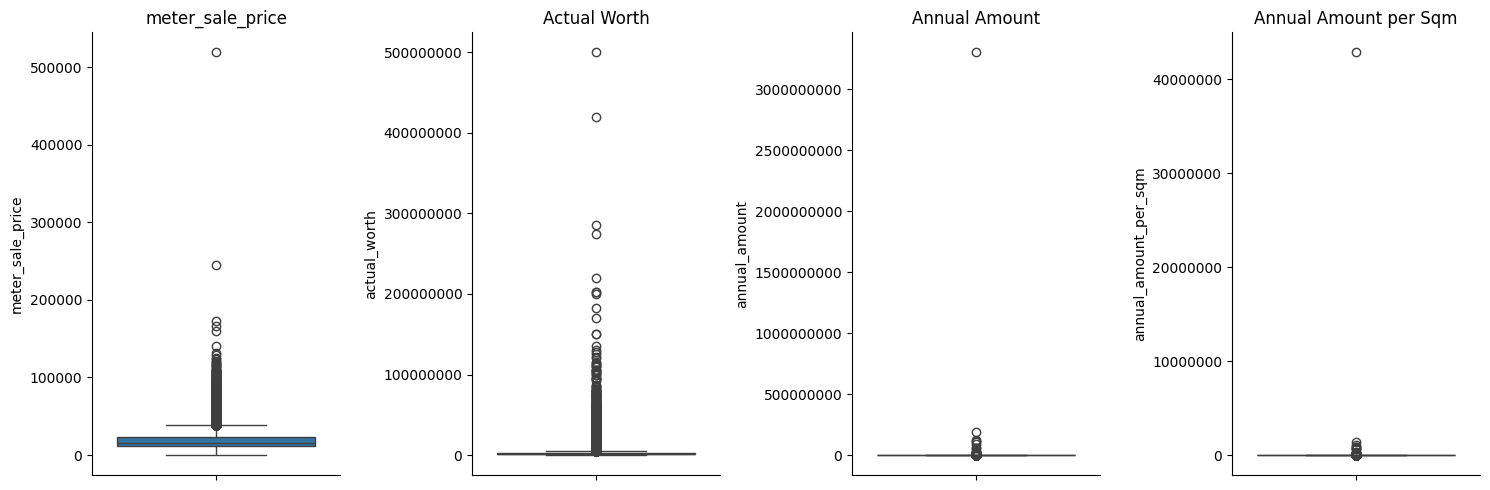

In [19]:
# 3. EXPLORACIÓN INICIAL Y LIMPIEZA DE DATOS
print("\n3. DETECCIÓN Y MANEJO DE OUTLIERS")
print("-----------------------------------")
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
# Boxplot para 'meter_sale_price'
sns.boxplot(ax=axes[0], y=df_transactions['meter_sale_price'])
axes[0].set_title('meter_sale_price')
axes[0].get_yaxis().get_major_formatter().set_scientific(False)

# Boxplot para 'actual_worth'
sns.boxplot(ax=axes[1], y=df_transactions['actual_worth'])
axes[1].set_title('Actual Worth')
axes[1].get_yaxis().get_major_formatter().set_scientific(False)

# Boxplot para 'annual_amount'
sns.boxplot(ax=axes[2], y=df_contracts['annual_amount'])
axes[2].set_title('Annual Amount')
axes[2].get_yaxis().get_major_formatter().set_scientific(False)

# Boxplot para 'annual_amount_per_sqm'
sns.boxplot(ax=axes[3], y=df_contracts['annual_amount_per_sqm'])
axes[3].set_title('Annual Amount per Sqm')
axes[3].get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()
sns.despine()
plt.show()

In [20]:
"""
# Mostrar resultado con outliers (transactions)
display(df_transactions_clean[['area_name', 'meter_sale_price', 'actual_worth']].sort_values(by='meter_sale_price', ascending=False).head(10))
# Eliminar outliers en meter_sale_price
q1 = df_transactions_clean['meter_sale_price'].quantile(0.01)
q3 = df_transactions_clean['meter_sale_price'].quantile(0.99)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_transactions_clean = df_transactions_clean[(df_transactions_clean['meter_sale_price'] >= lower_bound) & 
                                             (df_transactions_clean['meter_sale_price'] <= upper_bound)]
# Mostrar resultado sin outliers
display(df_transactions_clean[['area_name', 'meter_sale_price', 'actual_worth']].sort_values(by='meter_sale_price', ascending=False).head(10))

# Mostrar resultado con outliers (contracts)
display(df_contracts_clean[['area_name', 'annual_amount', 'annual_amount_per_sqm']].sort_values(by='annual_amount', ascending=False).head(10))
# Eliminar outliers en annual_amount_per_sqm
q1 = df_contracts_clean['annual_amount_per_sqm'].quantile(0.01)
q3 = df_contracts_clean['annual_amount_per_sqm'].quantile(0.99)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_contracts_clean = df_contracts_clean[(df_contracts_clean['annual_amount_per_sqm'] >= lower_bound) & 
                                             (df_contracts_clean['annual_amount_per_sqm'] <= upper_bound)]

# Mostrar resultado sin outliers
display(df_contracts_clean[['area_name', 'annual_amount', 'annual_amount_per_sqm']].sort_values(by='annual_amount', ascending=False).head(10))

print(f'Filas finales en dataset de transacciones: {df_transactions_clean.shape[0]}')
print(f'Filas finales en dataset de contratos de alquiler: {df_contracts_clean.shape[0]}')

"""

"\n# Mostrar resultado con outliers (transactions)\ndisplay(df_transactions_clean[['area_name', 'meter_sale_price', 'actual_worth']].sort_values(by='meter_sale_price', ascending=False).head(10))\n# Eliminar outliers en meter_sale_price\nq1 = df_transactions_clean['meter_sale_price'].quantile(0.01)\nq3 = df_transactions_clean['meter_sale_price'].quantile(0.99)\niqr = q3 - q1\nlower_bound = q1 - 1.5 * iqr\nupper_bound = q3 + 1.5 * iqr\n\ndf_transactions_clean = df_transactions_clean[(df_transactions_clean['meter_sale_price'] >= lower_bound) & \n                                             (df_transactions_clean['meter_sale_price'] <= upper_bound)]\n# Mostrar resultado sin outliers\ndisplay(df_transactions_clean[['area_name', 'meter_sale_price', 'actual_worth']].sort_values(by='meter_sale_price', ascending=False).head(10))\n\n# Mostrar resultado con outliers (contracts)\ndisplay(df_contracts_clean[['area_name', 'annual_amount', 'annual_amount_per_sqm']].sort_values(by='annual_amount', asc

# Mejorar la consistencia del código
---

In [21]:
# 3. ANÁLISIS UTILIZANDO LA RELACIÓN DE CLAVES FORÁNEAS
print("\n3. ANÁLISIS UTILIZANDO LA RELACIÓN DE CLAVES FORÁNEAS")

# 3.1 Unión de datasets a través de area_id para análisis por área
# Esto asegura que sólo consideramos áreas que existen en ambos datasets
print("\n3.1 Unión de datasets a través de area_id")

# Crear dataframes auxiliares con agregaciones por área y tipo de habitación
trans_by_area = df_transactions.groupby(['area_id', 'area_name', 'rooms_standardized']).agg({
    'actual_worth': 'median',
    'meter_sale_price': 'median',
    'transaction_id': 'count'
}).rename(columns={'transaction_id': 'transaction_count'}).reset_index()

contracts_by_area = df_contracts.groupby(['area_id', 'area_name', 'rooms_standardized']).agg({
    'annual_amount': 'median',
    'annual_amount_per_sqm': 'median',
    'contract_id': 'count'
}).rename(columns={'contract_id': 'contract_count'}).reset_index()

# Unir los datasets utilizando area_id como clave de unión (clave foránea)
combined_area_analysis = pd.merge(
    trans_by_area,
    contracts_by_area,
    on=['area_id', 'area_name', 'rooms_standardized'],
    how='inner'  # Solo áreas que existen en ambas tablas
)

print(f"Análisis combinado por área: {combined_area_analysis.shape[0]} combinaciones de área-tipo")
print(f"Número de áreas únicas en el análisis combinado: {combined_area_analysis['area_id'].nunique()}")


3. ANÁLISIS UTILIZANDO LA RELACIÓN DE CLAVES FORÁNEAS

3.1 Unión de datasets a través de area_id
Análisis combinado por área: 46 combinaciones de área-tipo
Número de áreas únicas en el análisis combinado: 39


# Análisis de cartera de renta
---

Proporción entre el ingreso anual por alquiler de la propiedad y el precio de compra o valor de mercado. Permite evaluar el retorno obtenido a través de rentas.


4. ANÁLISIS DE CARTERA DE RENTA
---------------------------------


,area_id,area_name,rooms_standardized,actual_worth,meter_sale_price,transaction_count,annual_amount,annual_amount_per_sqm,contract_count,rental_yield
32,463,Rukan,Studio,390050.0,10427.050,72,37000.0,975.60980,74,9.485963
7,343,International City,Studio,255000.0,5777.780,1639,24000.0,534.65120,15154,9.411765
29,459,Dubai Investment Park Second,Studio,292500.0,6576.790,42,27500.0,690.47620,1779,9.401709
27,452,Dubai Studio City,Studio,512940.0,15081.995,918,45000.0,1243.90240,415,8.772956
30,462,Dubai South Residential District,Studio,365000.0,9121.060,357,32000.0,789.47370,1780,8.767123
26,451,Remraam,Studio,380000.0,9064.760,136,33000.0,750.00000,493,8.684211
0,232,Mirdif,Studio,490000.0,10785.460,33,41250.0,844.43430,186,8.418367
31,462,Dubai World Central,Studio,613000.0,18377.540,1211,51250.0,1278.52565,138,8.360522
40,484,Silicon Oasis,Studio,390000.0,9501.815,800,32548.5,768.29270,6900,8.345769
2,307,Al Safouh First,Studio,577500.0,12830.485,10,48000.0,890.90910,303,8.311688


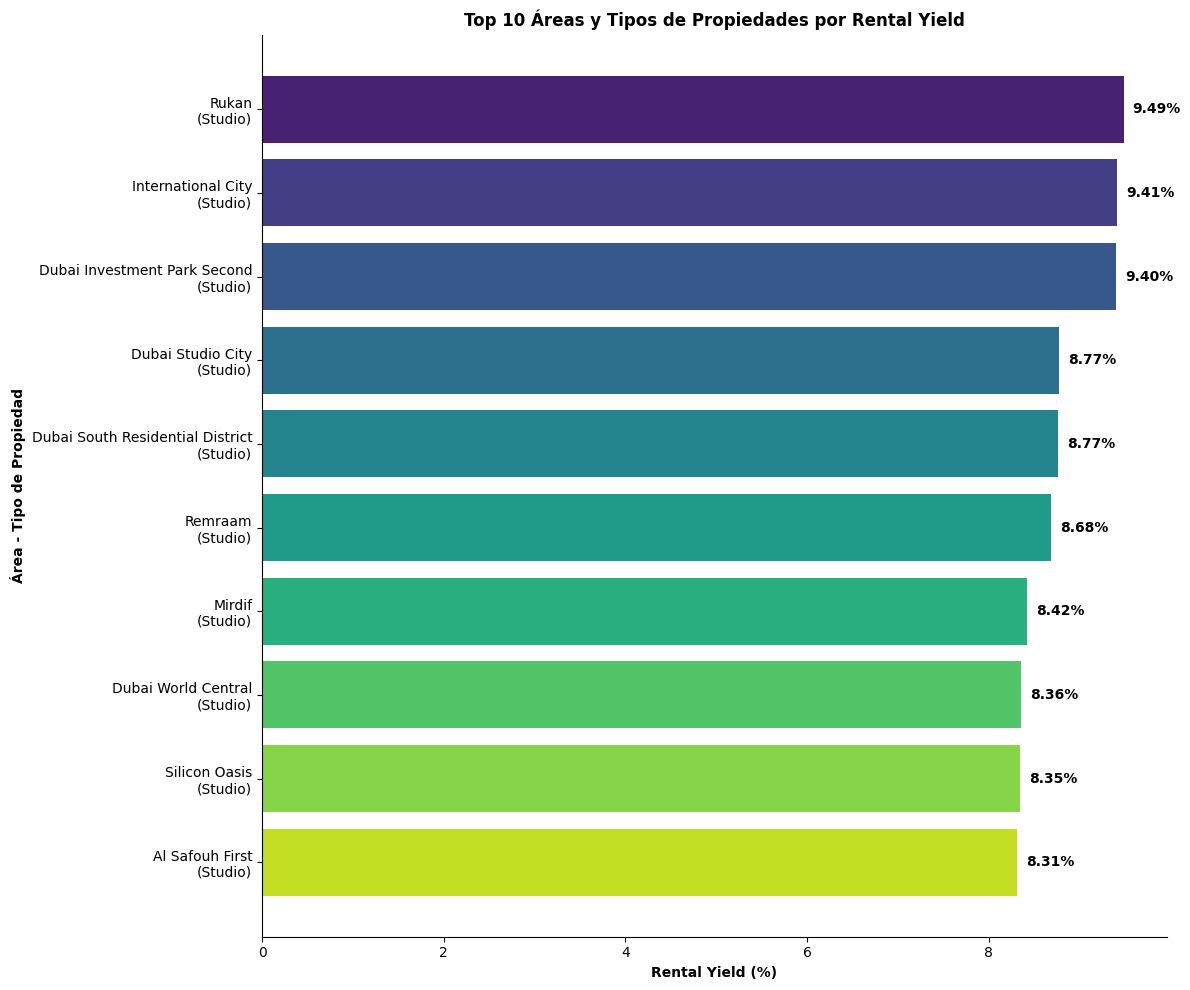

In [32]:
# 4. ANÁLISIS DE CARTERA DE RENTA
print("\n4. ANÁLISIS DE CARTERA DE RENTA")
print("---------------------------------")

# 4.1 Cálculo del Rental Yield utilizando el dataset combinado por area_id
# Esto asegura que solo usamos datos de áreas que existen en ambos datasets
combined_area_analysis['rental_yield'] = (combined_area_analysis['annual_amount'] / combined_area_analysis['actual_worth']) * 100

# 4.2 Filtrar y ordenar para identificar las mejores oportunidades de Cartera de Renta
rental_yield_df = combined_area_analysis[
    (combined_area_analysis['annual_amount'] > 10000) &  
    (combined_area_analysis['actual_worth'] > 100000) &  
    (combined_area_analysis['rental_yield'] < 20) &  
    (combined_area_analysis['transaction_count'] >= 5) &  
    (combined_area_analysis['contract_count'] >= 5)
]

# Ordenar por rental yield (de mayor a menor)
top_rental_yield = rental_yield_df.sort_values('rental_yield', ascending=False).head(10)
display(top_rental_yield.head(10))

# Visualización del top 15 áreas y tipos de propiedades por rental yield
plt.figure(figsize=(12, 10))
bars = plt.barh(top_rental_yield['area_name'] + '\n(' + top_rental_yield['rooms_standardized'] + ')', 
         top_rental_yield['rental_yield'], color=sns.color_palette('viridis', 10))
plt.xlabel('Rental Yield (%)', fontsize=10, fontweight='bold')
plt.ylabel('Área - Tipo de Propiedad', fontsize=10, fontweight='bold')
plt.title('Top 10 Áreas y Tipos de Propiedades por Rental Yield', fontweight='bold')
plt.gca().invert_yaxis()  # Para mostrar el valor más alto en la parte superior

# Añadir etiquetas a las barras
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('rental_yield.png', dpi=300, bbox_inches='tight')
sns.despine()

# Análisis de la Cartera Growth
---

Incremento porcentual del precio de un inmueble en un periodo de tiempo determinado. Indica la apreciación de la propiedad.


5. ANÁLISIS DE CARTERA GROWTH
-------------------------------
Crecimiento promedio del mercado: 39.93%



Top 15 oportunidades para Cartera Growth:


year_quarter,area_name,rooms_standardized,current_price,price_growth
272,Dubai World Central,4 Bedrooms,13921.290,159.419919
295,Liwan,2 Bedrooms,10527.735,123.416805
231,Discovery Gardens,1 Bedrooms,11925.500,119.288487
192,Dubai Sports City,2 Bedrooms,13173.190,109.966114
307,Majan,2 Bedrooms,12701.400,109.162963
353,Dubai Production City (IMPZ),3 Bedrooms,11111.615,101.111382
345,International City,Studio,13600.220,99.513108
294,Liwan,1 Bedrooms,9418.450,96.914704
354,Dubai Production City (IMPZ),Studio,13424.945,91.943145
253,Dubai Investment Park First,4 Bedrooms,8514.740,85.523294


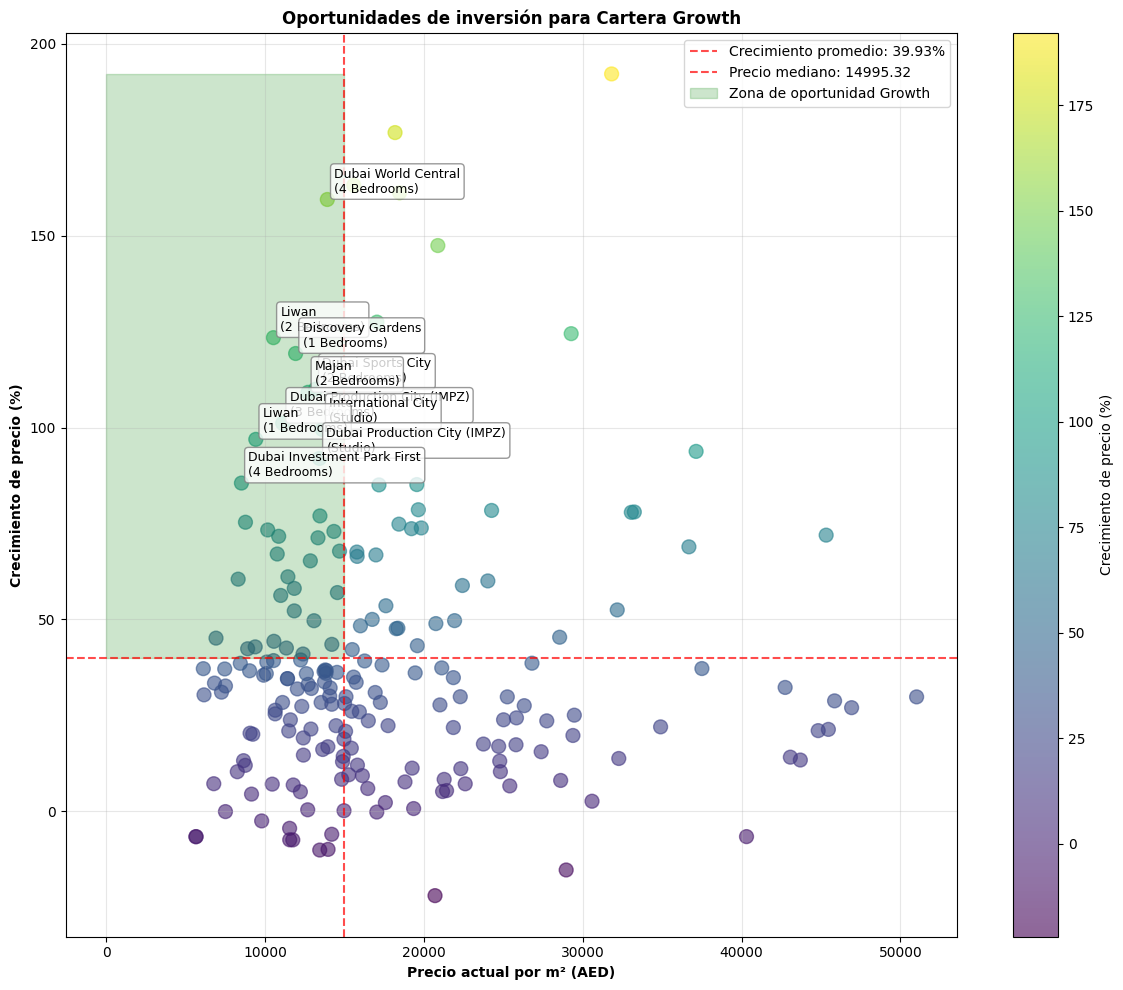

In [23]:
# 5. ANÁLISIS DE CARTERA GROWTH
print("\n5. ANÁLISIS DE CARTERA GROWTH")
print("-------------------------------")

# 5.1 Análisis de tendencias de precios a lo largo del tiempo
# Utilizamos area_id para asegurar consistencia entre períodos
price_trends = df_transactions.groupby(['year_quarter', 'area_id', 'area_name', 'rooms_standardized'])['meter_sale_price'].median().reset_index()

# Pivotear para facilitar el cálculo de crecimiento
price_pivot = price_trends.pivot_table(
    index=['area_id', 'area_name', 'rooms_standardized'],
    columns='year_quarter',
    values='meter_sale_price'
).reset_index()

# 5.2 Obtener áreas presentes en ambos conjuntos de datos
valid_area_ids = set(combined_area_analysis['area_id'].unique())

# Filtrar para usar solo áreas que están en ambos conjuntos
price_pivot = price_pivot[price_pivot['area_id'].isin(valid_area_ids)]

# 5.3 Calcular tasa de crecimiento para cada combinación de área y tipo de propiedad
year_quarter_cols = [col for col in price_pivot.columns if isinstance(col, str) and '-Q' in col]
year_quarter_cols.sort()

if len(year_quarter_cols) >= 2:
    first_period = year_quarter_cols[0]
    last_period = year_quarter_cols[-1]
    
    # Calcular la tasa de crecimiento
    growth_df = price_pivot[['area_id', 'area_name', 'rooms_standardized', first_period, last_period]].copy()
    growth_df = growth_df.dropna()  # Eliminar filas con valores faltantes
    
    growth_df['price_growth'] = ((growth_df[last_period] / growth_df[first_period]) - 1) * 100
    growth_df['current_price'] = growth_df[last_period]
    
    # Filtrar para mostrar solo propiedades con datos confiables
    growth_df = growth_df[
        (growth_df['rooms_standardized'] != 'Unknown') &
        (growth_df['rooms_standardized'] != 'Other') &
        (growth_df['current_price'] > 0) &
        (growth_df['price_growth'] > -50) &  # Filtrar caídas extremas
        (growth_df['price_growth'] < 200)    # Filtrar crecimientos no realistas
    ]
    
    # Calcular el promedio de crecimiento del mercado
    avg_market_growth = growth_df['price_growth'].mean()
    print(f"Crecimiento promedio del mercado: {avg_market_growth:.2f}%")
    
    # Identificar propiedades con precio relativamente bajo pero crecimiento alto
    growth_opportunities = growth_df[
        (growth_df['current_price'] < growth_df['current_price'].median()) &  # Precio por debajo de la mediana
        (growth_df['price_growth'] > avg_market_growth)  # Crecimiento por encima del promedio
    ].sort_values('price_growth', ascending=False)
    
    # Visualización de las mejores oportunidades para Cartera Growth
    plt.figure(figsize=(12, 10))
    
    # Crear un gráfico de dispersión
    scatter = plt.scatter(
        growth_df['current_price'], 
        growth_df['price_growth'],
        alpha=0.6, 
        c=growth_df['price_growth'], 
        cmap='viridis',
        s=100
    )
    
    # Añadir una línea horizontal para el crecimiento promedio del mercado
    plt.axhline(y=avg_market_growth, color='r', linestyle='--', alpha=0.7, 
                label=f'Crecimiento promedio: {avg_market_growth:.2f}%')
    
    # Añadir una línea vertical para el precio mediano
    plt.axvline(x=growth_df['current_price'].median(), color='r', linestyle='--', alpha=0.7,
                label=f'Precio mediano: {growth_df["current_price"].median():.2f}')
    
    # Resaltar el cuadrante de interés (precio bajo, crecimiento alto)
    plt.fill_between([0, growth_df['current_price'].median()], 
                    [avg_market_growth, avg_market_growth], 
                    [growth_df['price_growth'].max(), growth_df['price_growth'].max()], 
                    alpha=0.2, color='green',
                    label='Zona de oportunidad Growth')
    
    # Anotar los puntos principales de oportunidad Growth
    for i, row in growth_opportunities.head(10).iterrows():
        plt.annotate(
            f"{row['area_name']}\n({row['rooms_standardized']})",
            (row['current_price'], row['price_growth']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    
    plt.colorbar(scatter, label='Crecimiento de precio (%)')
    plt.xlabel('Precio actual por m² (AED)', fontweight='bold')
    plt.ylabel('Crecimiento de precio (%)', fontweight='bold')
    plt.title('Oportunidades de inversión para Cartera Growth', fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('growth_opportunities.png', dpi=300, bbox_inches='tight')
    
    # Top 15 oportunidades para Cartera Growth (tabla)
    top_growth = growth_opportunities.head(15)[['area_name', 'rooms_standardized', 'current_price', 'price_growth']]
    print("\nTop 15 oportunidades para Cartera Growth:")
    display(top_growth.head(15))

# Análisis del PRGI
---

Compara la tasa de crecimiento del precio de venta con la tasa de crecimiento de los precios de alquiler en un periodo específico. Si el valor del PRGI es significativamente mayor que 1, podría señalar un posible desequilibrio entre el alza de los precios de venta y el alza de los alquileres, lo que sugiere un riesgo de burbuja o especulación en el mercado.


6. ANÁLISIS DE BURBUJA INMOBILIARIA
-------------------------------------



Top 15 áreas con posible riesgo de burbuja (PRGI alto):


year_quarter,area_name,rooms_standardized,price_growth,rent_growth,PRGI
31,Silicon Oasis,Studio,147.417767,38.390801,1.787819
6,Jumeirah Lakes Towers,Studio,124.459816,26.313704,1.777003
26,Majan,Studio,161.181407,47.731527,1.767946
0,Dubai Marina,Studio,77.995089,24.919386,1.424880
30,International City,Studio,99.513108,43.373816,1.391559
32,Dubai Production City (IMPZ),Studio,91.943145,41.554687,1.355965
11,Palm Jumeirah,Studio,37.197151,2.334151,1.340678
20,Discovery Gardens,Studio,61.105529,23.620816,1.303223
7,The Greens,Studio,48.911696,21.021224,1.230459
27,Dubai Land Residence Complex,Studio,67.551364,46.341467,1.144934


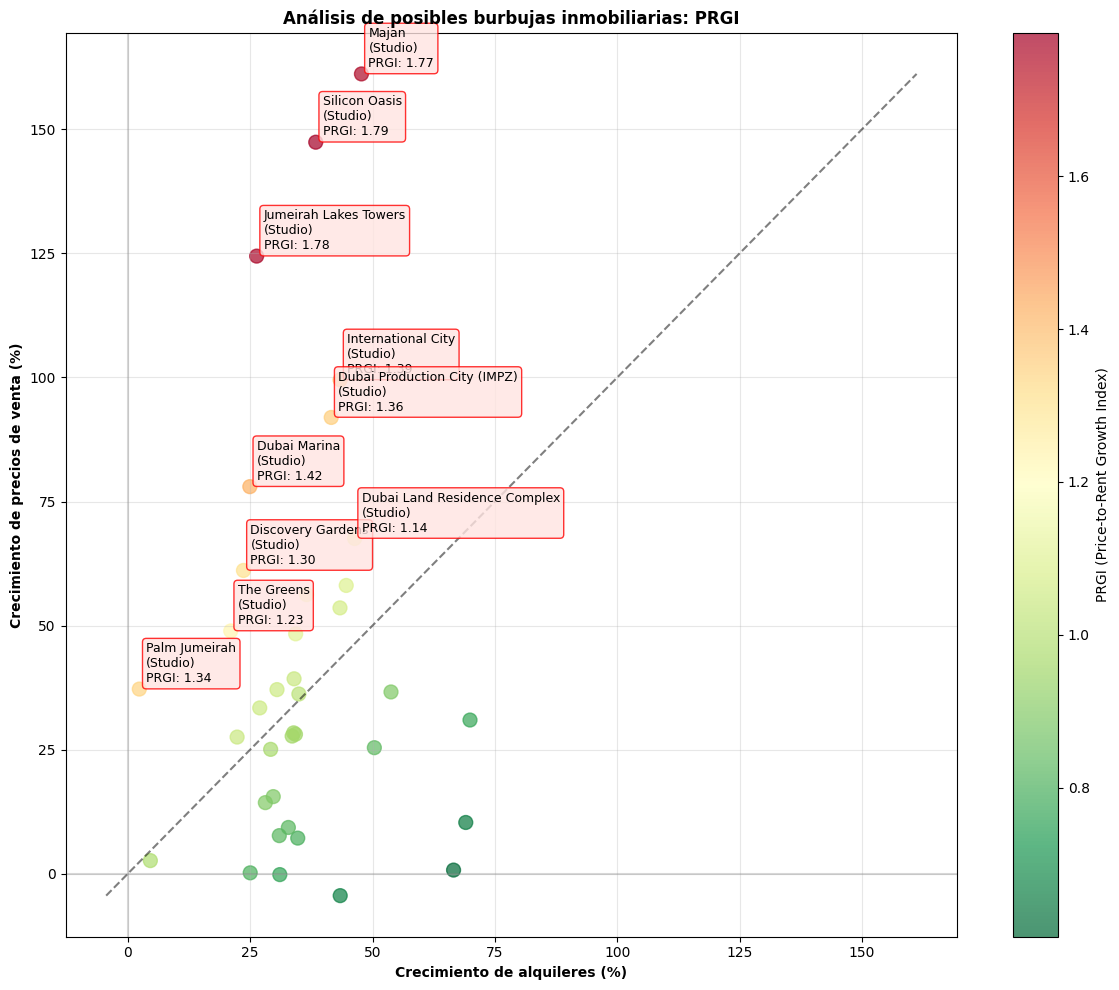

In [24]:
# 6. ANÁLISIS DE BURBUJA INMOBILIARIA
print("\n6. ANÁLISIS DE BURBUJA INMOBILIARIA")
print("-------------------------------------")

# 6.1 Calcular el índice de crecimiento precio-alquiler (PRGI)
# Primero, necesitamos datos de crecimiento de precios de alquiler
rent_trends = df_contracts.groupby(['year_quarter', 'area_id', 'area_name', 'rooms_standardized'])['annual_amount_per_sqm'].median().reset_index()

# Filtrar para usar solo áreas presentes en ambos conjuntos
rent_trends = rent_trends[rent_trends['area_id'].isin(valid_area_ids)]

# Pivotear para facilitar el cálculo de crecimiento
rent_pivot = rent_trends.pivot_table(
    index=['area_id', 'area_name', 'rooms_standardized'],
    columns='year_quarter',
    values='annual_amount_per_sqm'
).reset_index()

# 6.2 Calcular el PRGI (Price-to-Rent Growth Index)
rent_year_quarter_cols = [col for col in rent_pivot.columns if isinstance(col, str) and '-Q' in col]
rent_year_quarter_cols.sort()

if len(year_quarter_cols) >= 2 and len(rent_year_quarter_cols) >= 2:
    rent_first_period = rent_year_quarter_cols[0]
    rent_last_period = rent_year_quarter_cols[-1]
    
    # Calcular el crecimiento de alquileres
    rent_growth_df = rent_pivot[['area_id', 'area_name', 'rooms_standardized', rent_first_period, rent_last_period]].copy()
    rent_growth_df = rent_growth_df.dropna()
    
    rent_growth_df['rent_growth'] = ((rent_growth_df[rent_last_period] / rent_growth_df[rent_first_period]) - 1) * 100
    
    # Combinar con el crecimiento de precios de venta usando area_id como clave de unión
    bubble_analysis = pd.merge(
        growth_df[['area_id', 'area_name', 'rooms_standardized', 'price_growth', 'current_price']],
        rent_growth_df[['area_id', 'area_name', 'rooms_standardized', 'rent_growth']],
        on=['area_id', 'area_name', 'rooms_standardized'],
        how='inner'
    )
    
    # Calcular el PRGI
    # PRGI = Tasa de crecimiento de precios de venta / Tasa de crecimiento de alquileres
    # Para evitar divisiones por cero, añadimos un pequeño valor
    bubble_analysis['PRGI'] = (bubble_analysis['price_growth'] + 100) / (bubble_analysis['rent_growth'] + 100)
    
    # Filtrar para resultados más confiables
    bubble_analysis = bubble_analysis[
        (bubble_analysis['rooms_standardized'] != 'Unknown') &
        (bubble_analysis['rooms_standardized'] != 'Other') &
        (bubble_analysis['rent_growth'] > -50) &  # Filtrar caídas extremas
        (bubble_analysis['rent_growth'] < 200)    # Filtrar crecimientos no realistas
    ]
    
    # Visualización del análisis de burbuja
    plt.figure(figsize=(12, 10))
    
    # Gráfico de dispersión de crecimiento de precios vs crecimiento de alquileres
    scatter = plt.scatter(
        bubble_analysis['rent_growth'], 
        bubble_analysis['price_growth'],
        alpha=0.7, 
        c=bubble_analysis['PRGI'], 
        cmap='RdYlGn_r',  # Rojo para valores altos (posible burbuja), verde para valores bajos
        s=100
    )
    
    # Línea diagonal de referencia (crecimiento igual)
    max_val = max(bubble_analysis['rent_growth'].max(), bubble_analysis['price_growth'].max())
    min_val = min(bubble_analysis['rent_growth'].min(), bubble_analysis['price_growth'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Crecimiento equilibrado')
    
    # Anotar los puntos con PRGI más alto (posibles burbujas)
    for i, row in bubble_analysis.sort_values('PRGI', ascending=False).head(10).iterrows():
        plt.annotate(
            f"{row['area_name']}\n({row['rooms_standardized']})\nPRGI: {row['PRGI']:.2f}",
            (row['rent_growth'], row['price_growth']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="mistyrose", ec="red", alpha=0.8)
        )
    
    plt.colorbar(scatter, label='PRGI (Price-to-Rent Growth Index)')
    plt.xlabel('Crecimiento de alquileres (%)', fontweight='bold')
    plt.ylabel('Crecimiento de precios de venta (%)', fontweight='bold')
    plt.title('Análisis de posibles burbujas inmobiliarias: PRGI', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.savefig('bubble_analysis.png', dpi=300, bbox_inches='tight')
    
    # Top áreas con posible sobrevaloración (PRGI alto)
    top_bubble_risk = bubble_analysis.sort_values('PRGI', ascending=False).head(15)[
        ['area_name', 'rooms_standardized', 'price_growth', 'rent_growth', 'PRGI']
    ]
    print("\nTop 15 áreas con posible riesgo de burbuja (PRGI alto):")
    display(top_bubble_risk.head(15))

In [25]:
# 7. RESUMEN FINAL Y EXPORTACIÓN DE RESULTADOS
print("\n7. RESUMEN FINAL Y EXPORTACIÓN DE RESULTADOS")

# 7.1 Exportar las tablas principales a CSV para su uso en el informe
if 'top_rental_yield' in locals():
    top_rental_yield.to_csv('top_rental_yield.csv', index=False)
    print("Archivo 'top_rental_yield.csv' exportado correctamente.")

if 'top_growth' in locals():
    top_growth.to_csv('top_growth_opportunities.csv', index=False)
    print("Archivo 'top_growth_opportunities.csv' exportado correctamente.")

if 'top_bubble_risk' in locals():
    top_bubble_risk.to_csv('top_bubble_risk.csv', index=False)
    print("Archivo 'top_bubble_risk.csv' exportado correctamente.")

print("\nANÁLISIS COMPLETADO CON ÉXITO.")


7. RESUMEN FINAL Y EXPORTACIÓN DE RESULTADOS
Archivo 'top_rental_yield.csv' exportado correctamente.
Archivo 'top_growth_opportunities.csv' exportado correctamente.
Archivo 'top_bubble_risk.csv' exportado correctamente.

ANÁLISIS COMPLETADO CON ÉXITO.


## Análisis Exploratorio Complementario
---


8. ANÁLISIS EXPLORATORIO
--------------------------

// Estadísticas sobre las transacciones //


,actual_worth,meter_sale_price
count,2.372860e+05,237286.000000
mean,2.067655e+06,18156.426874
std,3.785516e+06,9300.424636
min,1.000000e+00,0.020000
25%,7.904858e+05,11925.002500
50%,1.350000e+06,16113.640000
75%,2.376000e+06,22765.657500
max,5.000000e+08,518851.610000



Valores por columna en el dataset de transacciones:
---
area_name: 78 valores
---
---
project_name_en: 1735 valores
---
nearest_landmark_en: 12 valores
Ejemplos: ['Sports City Swimming Academy' 'Expo 2020 Site' 'IMG World Adventures'
 'Burj Khalifa' 'Al Makhtoum International Airport']
---
nearest_metro_en: 34 valores
---
nearest_mall_en: 5 valores
Ejemplos: ['Marina Mall' 'Ibn-e-Battuta Mall' nan 'Dubai Mall'
 'Mall of the Emirates']
---
---
developer_name: 535 valores
---
---
project_status: 4 valores
Ejemplos: [nan 'FINISHED' 'ACTIVE' 'NOT_STARTED' 'CONDITIONAL_ACTIVATING']
---
---
---
building_name_en: 3058 valores
---
---
property_type_en: 2 valores
Ejemplos: ['Villa' 'Unit']
---
---
rooms_en: 11 valores
Ejemplos: [nan '3 B/R' '2 B/R' '4 B/R' '1 B/R']
---
---
transaction_id: 237286 valores


---
---
trans_group_en: 1 valores
Ejemplos: ['Sales']
---
reg_type_en: 2 valores
Ejemplos: ['Existing Properties' 'Off-Plan Properties']
---
procedure_name_en: 5 valores
Ejemplos: ['Sell' 'Sell - Pre registration' 'Sell Development'
 'Sale On Payment Plan' 'Sell Development - Pre Registration']
---
property_usage_en: 1 valores
Ejemplos: ['Residential']
---
---
---
rooms_standardized: 12 valores
Ejemplos: ['Unknown' '3 Bedrooms' '2 Bedrooms' '4 Bedrooms' '1 Bedrooms']
---
---
---
---
year_quarter: 9 valores
Ejemplos: ['2025-Q1' '2024-Q4' '2024-Q3' '2024-Q2' '2024-Q1']
---

// Estadísticas sobre los contratos //


,annual_amount,annual_amount_per_sqm
count,5.177670e+05,5.177670e+05
mean,9.398782e+04,9.350045e+02
std,4.607174e+06,5.966628e+04
min,1.000000e+00,1.500000e-03
25%,4.200000e+04,5.476190e+02
50%,6.000000e+04,7.066667e+02
75%,9.500000e+04,9.810811e+02
max,3.300038e+09,4.285764e+07



Valores por columna en el dataset de contratos:
---
area_name_en: 85 valores
---
master_project_en: 159 valores
---
area_name: 74 valores
---
---
project_name_en: 1236 valores
---
nearest_landmark_en: 14 valores
Ejemplos: ['Dubai Cycling Course' 'Motor City' 'Dubai International Airport'
 'Burj Khalifa' nan]
---
nearest_metro_en: 39 valores
---
nearest_mall_en: 5 valores
Ejemplos: [nan 'Mall of the Emirates' 'City Centre Mirdif' 'Dubai Mall'
 'Ibn-e-Battuta Mall']
---
---
rooms_en: 9 valores
Ejemplos: ['3 B/R' '1 B/R' '2 B/R' '4 B/R' 'Studio']
---
---
ejari_bus_property_type_en: 2 valores
Ejemplos: ['Villa' 'Unit']
---
---
ejari_property_type_en: 2 valores
Ejemplos: ['Villa' 'Flat']
---
---
ejari_property_sub_type_en: 9 valores
Ejemplos: ['3 bed rooms+hall' '1bed room+Hall' '2 bed rooms+hall' '4 bed rooms+hall'
 'Studio']
---
contract_id: 517767 valores
---
---
contract_reg_type_en: 2 valores
Ejemplos: ['New' 'Renew']
---
---
---
property_usage_en: 1 valores
Ejemplos: ['Residential']


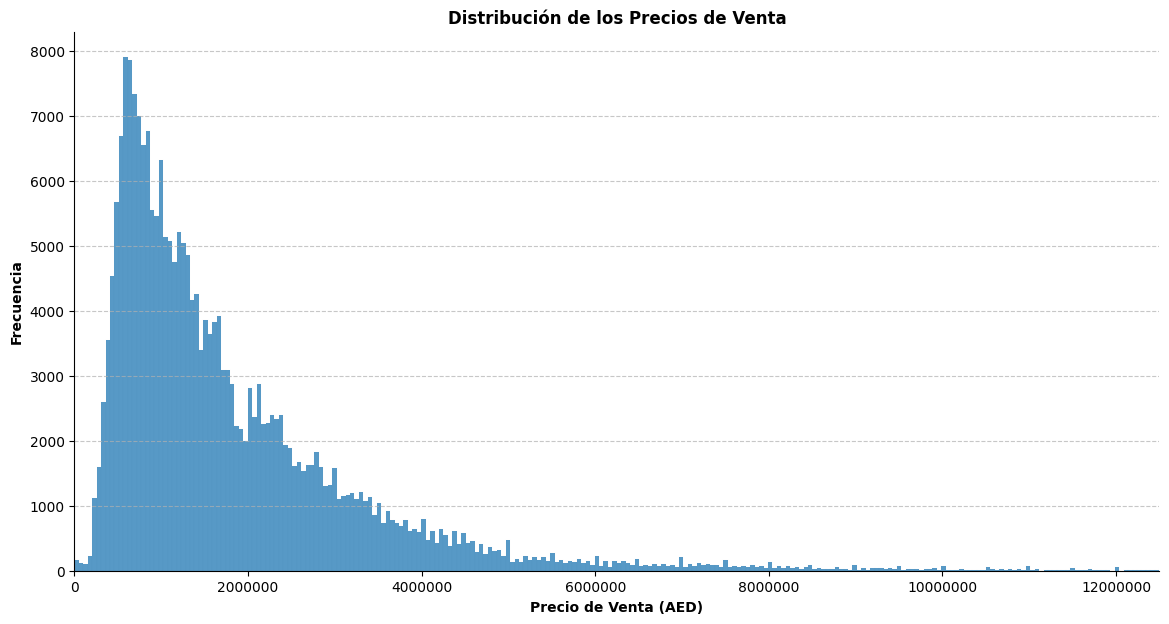


8.3. Análisis temporal - Evolución de Precios (Trimestral)


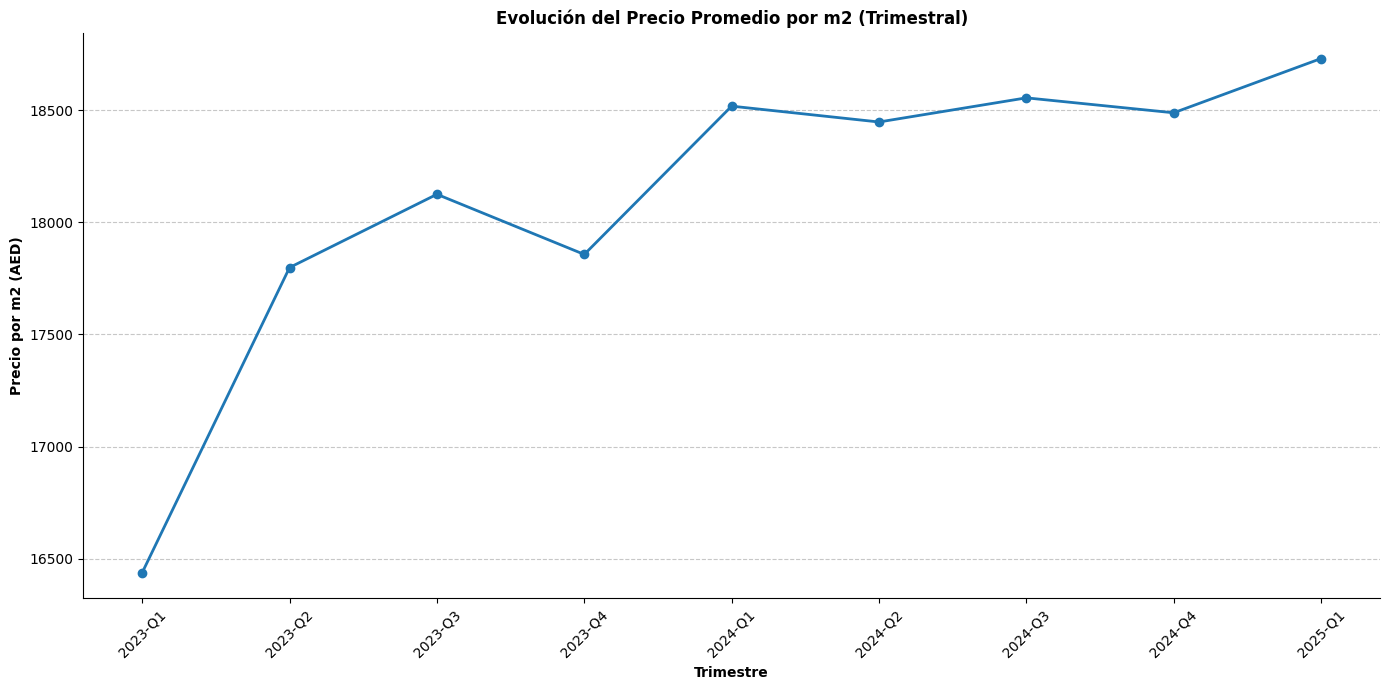


8.3.1. Análisis temporal - Evolución del Alquiler (Trimestral)


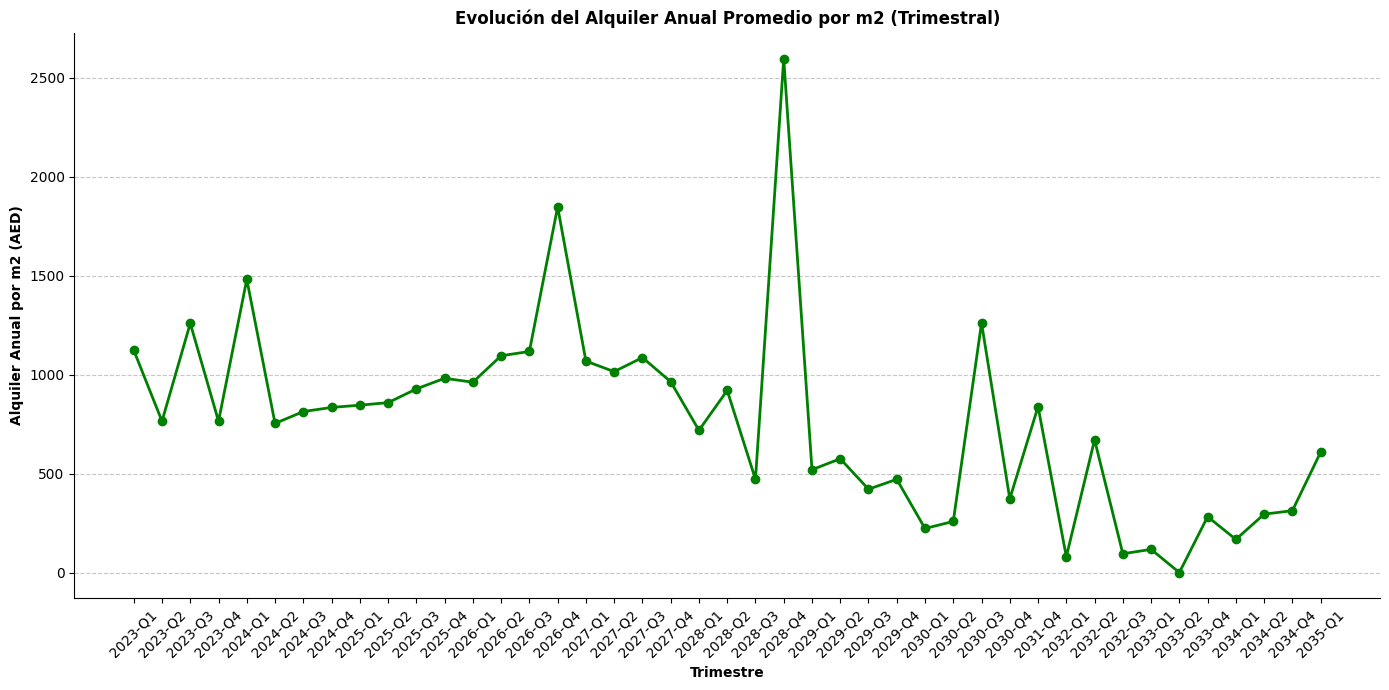

Análisis del pico en 2028:

Top 5 alquileres más altos en 2028:


,year_quarter,area_name,rooms_standardized,annual_amount_per_sqm
313849,2028-Q4,Discovery Gardens,Studio,127450.9804
468976,2028-Q4,NaN,4 Bedrooms + Hall,76320.8743
176388,2028-Q2,Burj Khalifa,1 Bedrooms + Hall,3842.1520
359761,2028-Q2,Dubai South Residential District,2 Bedrooms + Hall,2663.2766
26124,2028-Q1,NaN,4 Bedrooms + Hall,2628.3262


In [26]:
# 8. ANÁLISIS EXPLORATORIO
print("\n8. ANÁLISIS EXPLORATORIO")
print("--------------------------")

# Especificar las columnas numéricas para el resumen estadístico
numeric_columns_transactions = ['actual_worth', 'meter_sale_price', 'transaction_id']  
numeric_columns_contracts = ['annual_amount', 'annual_amount_per_sqm', 'contract_id'] 

# Resumen estadístico del dataset df_transactions
print('\n// Estadísticas sobre las transacciones //')
display(df_transactions[numeric_columns_transactions].describe())
print('\nValores por columna en el dataset de transacciones:')
for col in df_transactions.columns:
    if df_transactions[col].dtype == 'object':
        print(f'{col}: {df_transactions[col].nunique()} valores')
        if df_transactions[col].nunique() < 20:
            print(f'Ejemplos: {df_transactions[col].unique()[:5]}')
    print('---')

# Resumen estadístico del dataset df_contracts
print('\n// Estadísticas sobre los contratos //')
display(df_contracts[numeric_columns_contracts].describe())
print('\nValores por columna en el dataset de contratos:')
for col in df_contracts.columns:
    if df_contracts[col].dtype == 'object':
        print(f'{col}: {df_contracts[col].nunique()} valores')
        if df_contracts[col].nunique() < 20:
            print(f'Ejemplos: {df_contracts[col].unique()[:5]}')
    print('---')

# 8.1 Unión de datasets a través de area_id para análisis por área
# Año, trimestre y mes para análisis temporal
df_transactions['year'] = df_transactions['instance_date'].dt.year
df_transactions['quarter'] = df_transactions['instance_date'].dt.quarter
df_transactions['month'] = df_transactions['instance_date'].dt.month
df_transactions['year_quarter'] = df_transactions['year'].astype(str) + '-Q' + df_transactions['quarter'].astype(str)

df_contracts['year'] = df_contracts['contract_start_date'].dt.year
df_contracts['quarter'] = df_contracts['contract_start_date'].dt.quarter
df_contracts['month'] = df_contracts['contract_start_date'].dt.month
df_contracts['year_quarter'] = df_contracts['year'].astype(str) + '-Q' + df_contracts['quarter'].astype(str)

df_contracts['year'] = df_contracts['contract_end_date'].dt.year
df_contracts['quarter'] = df_contracts['contract_end_date'].dt.quarter
df_contracts['month'] = df_contracts['contract_end_date'].dt.month
df_contracts['year_quarter'] = df_contracts['year'].astype(str) + '-Q' + df_contracts['quarter'].astype(str)

# Esto asegura que sólo consideramos áreas que existen en ambos datasets
print("\n8.1 Unión de datasets a través de area_id")

# Crear dataframes auxiliares con agregaciones por área y tipo de habitación
trans_by_area = df_transactions.groupby(['area_id', 'area_name', 'rooms_standardized']).agg({
    'actual_worth': 'median',
    'meter_sale_price': 'median',
    'transaction_id': 'count'
}).rename(columns={'transaction_id': 'transaction_count'}).reset_index()

contracts_by_area = df_contracts.groupby(['area_id', 'area_name', 'rooms_standardized']).agg({
    'annual_amount': 'median',
    'annual_amount_per_sqm': 'median',
    'contract_id': 'count'
}).rename(columns={'contract_id': 'contract_count'}).reset_index()

# Unir los datasets utilizando area_id como clave de unión (clave foránea)
combined_area_analysis = pd.merge(
    trans_by_area,
    contracts_by_area,
    on=['area_id', 'area_name', 'rooms_standardized'],
    how='inner'  # Solo áreas que existen en ambas tablas
)

print(f"\n- Análisis combinado por área: {combined_area_analysis.shape[0]} combinaciones de área-tipo")
print(f"- Número de áreas únicas en el análisis combinado: {combined_area_analysis['area_id'].nunique()}")

# 8.2 Análisis de la distribución de los precios de venta
print("\n8.2. Análisis de la distribución de los precios de venta")

# Distribución de precios de venta 
plt.figure(figsize=(14,7))
sns.histplot(df_transactions['actual_worth']) 
plt.title('Distribución de los Precios de Venta', fontweight='bold')
plt.xlabel('Precio de Venta (AED)', fontsize=10, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=10, fontweight='bold')
plt.xlim(0, df_transactions['actual_worth'].quantile(0.99))  # Recortar outliers extremos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
sns.despine()
plt.show()

# 8.3 Análisis temporal sobre la evolución de precios (trimestral)
print("\n8.3. Análisis temporal - Evolución de Precios (Trimestral)")

# Evolución de precios de venta por trimestre
quarterly_price = df_transactions.groupby('year_quarter')['meter_sale_price'].mean().reset_index()
quarterly_price['year_quarter'] = quarterly_price['year_quarter'].astype(str)
plt.figure(figsize=(14,7))
plt.plot(quarterly_price['year_quarter'], quarterly_price['meter_sale_price'], marker='o', linewidth=2)
plt.title('Evolución del Precio Promedio por m2 (Trimestral)', fontweight='bold')
plt.xlabel('Trimestre', fontsize=10, fontweight='bold')
plt.ylabel('Precio por m2 (AED)', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.show()

# Evolución de precios de alquiler por trimestre
print("\n8.3.1. Análisis temporal - Evolución del Alquiler (Trimestral)")

quarterly_rent = df_contracts.groupby('year_quarter')['annual_amount_per_sqm'].mean().reset_index()
quarterly_rent['year_quarter'] = quarterly_rent['year_quarter'].astype(str)
plt.figure(figsize=(14,7))
plt.plot(quarterly_rent['year_quarter'], quarterly_rent['annual_amount_per_sqm'], marker='o', linewidth=2, color='green')
plt.title('Evolución del Alquiler Anual Promedio por m2 (Trimestral)', fontweight='bold')
plt.xlabel('Trimestre', fontsize=10, fontweight='bold')
plt.ylabel('Alquiler Anual por m2 (AED)', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.show()

# Encontrar los valores extremos en 2028
print("Análisis del pico en 2028:")
high_rent_2028 = df_contracts[
    df_contracts['year_quarter'].str.startswith('2028')
].nlargest(5, 'annual_amount_per_sqm')[
    ['year_quarter', 'area_name', 'rooms_standardized', 'annual_amount_per_sqm']
]

print("\nTop 5 alquileres más altos en 2028:")
display(high_rent_2028)


8.4. Análisis por área


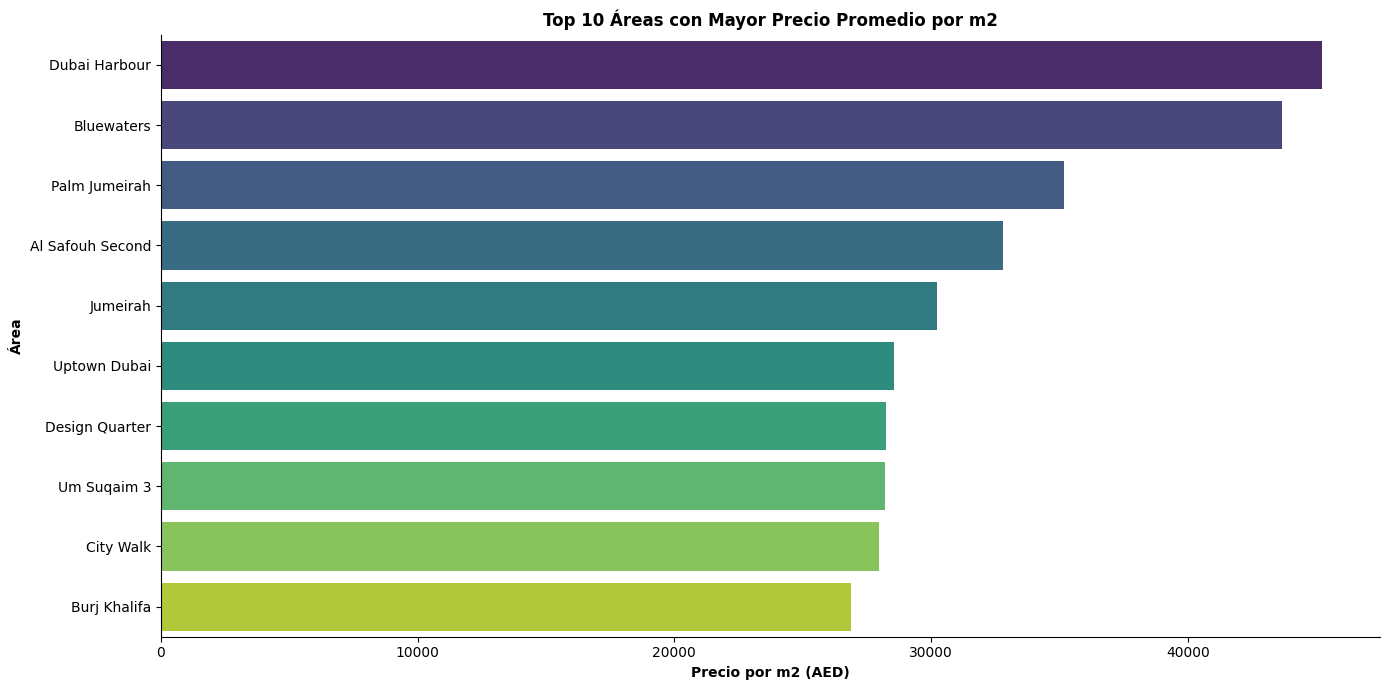

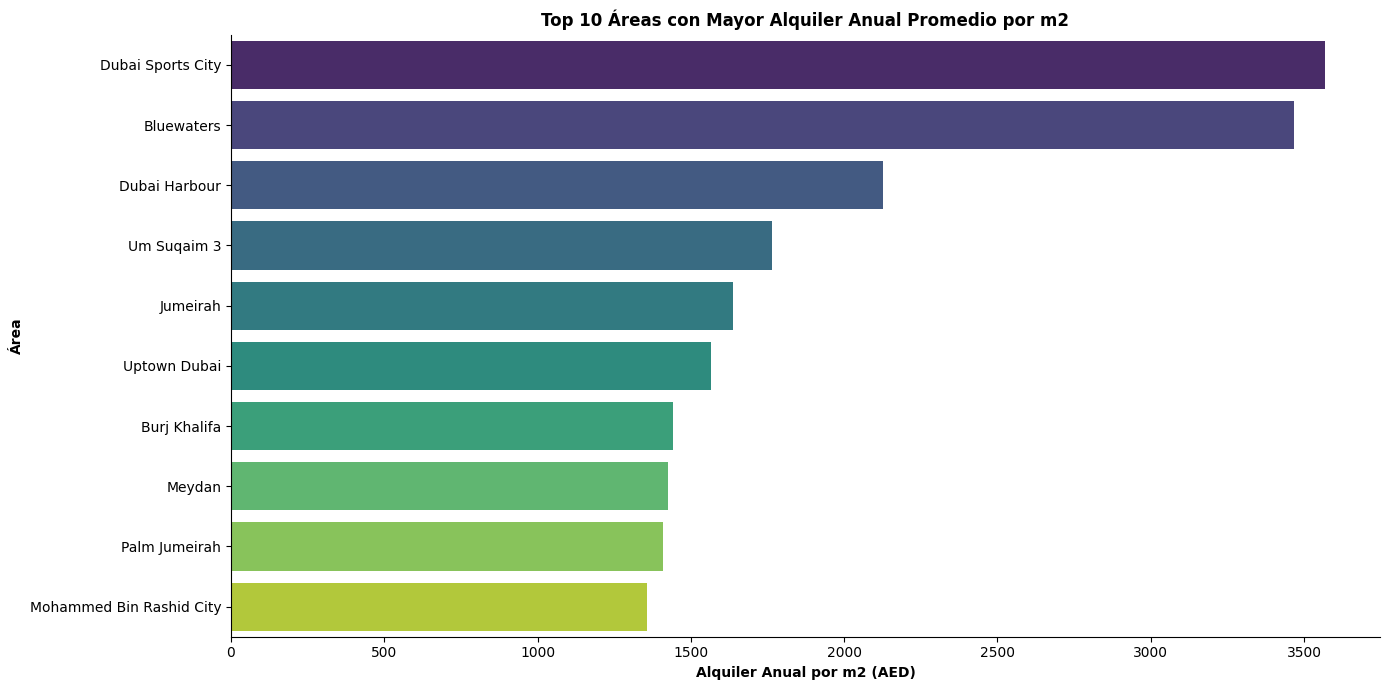

8.5. Análisis por tipo de propiedad


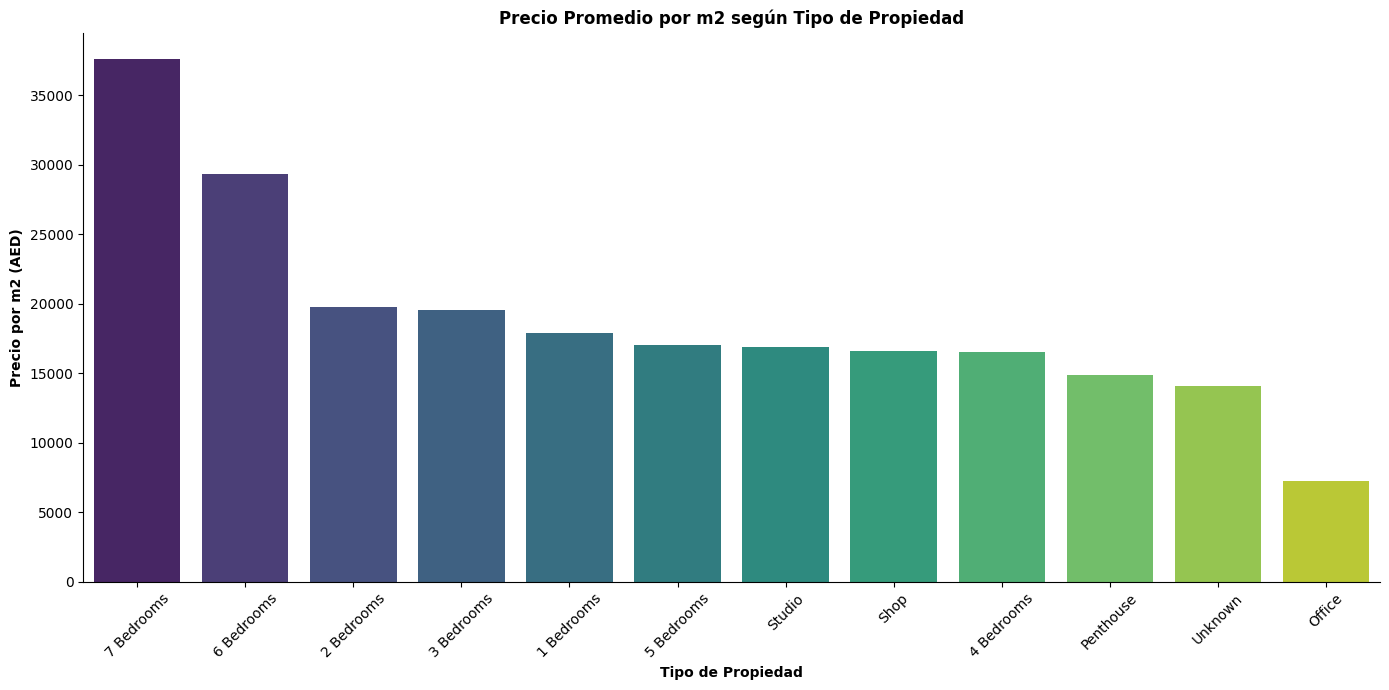

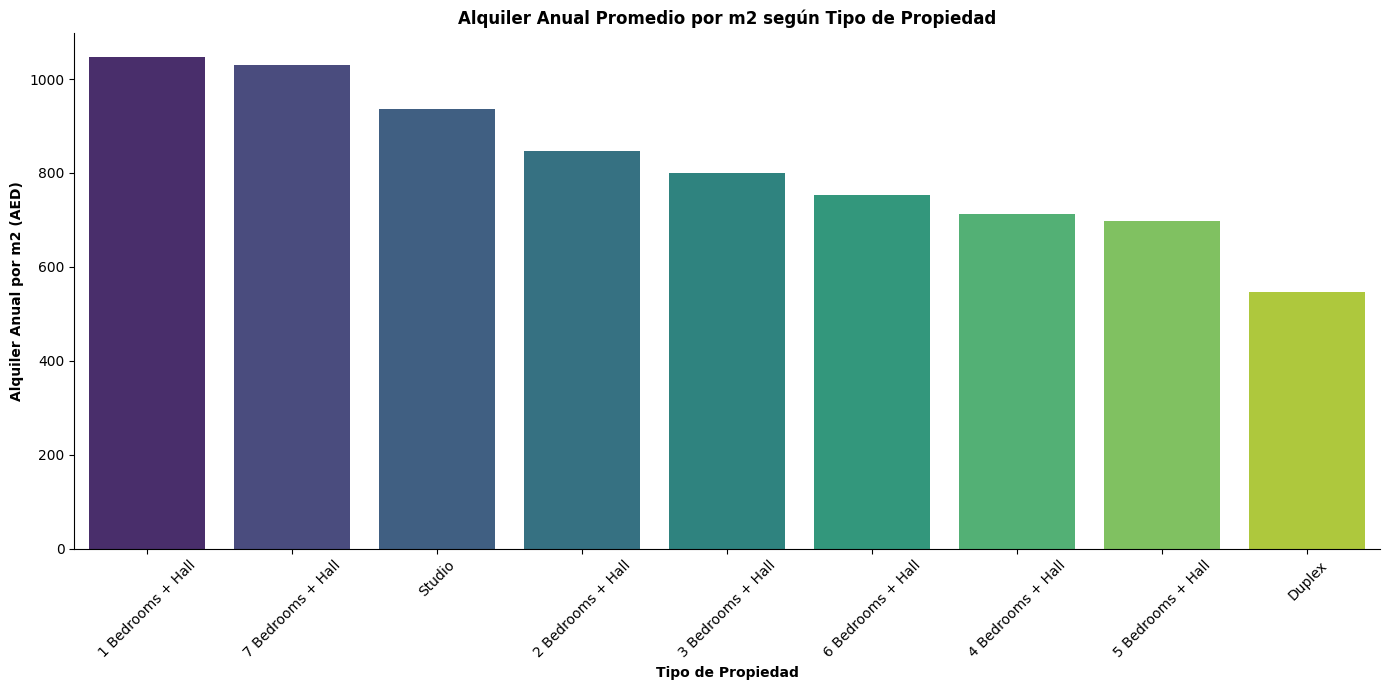


Tipo de propiedad: 1 Bedrooms + Hall
Top 5 áreas con mayor alquiler promedio:
rooms_standardized         area_name  annual_amount_per_sqm
 1 Bedrooms + Hall Dubai Sports City            8278.824621
 1 Bedrooms + Hall        Bluewaters            2315.496559
 1 Bedrooms + Hall     Dubai Harbour            2112.395061
 1 Bedrooms + Hall       Um Suqaim 3            1753.003923
 1 Bedrooms + Hall      Uptown Dubai            1706.767266
--------------------------------------------------

Tipo de propiedad: 2 Bedrooms + Hall
Top 5 áreas con mayor alquiler promedio:
rooms_standardized     area_name  annual_amount_per_sqm
 2 Bedrooms + Hall    Bluewaters            4104.561591
 2 Bedrooms + Hall Dubai Harbour            2099.925682
 2 Bedrooms + Hall   Um Suqaim 3            1742.353012
 2 Bedrooms + Hall  Uptown Dubai            1642.593686
 2 Bedrooms + Hall      Jumeirah            1629.827990
--------------------------------------------------

Tipo de propiedad: 3 Bedrooms + Hall
Top 5 

In [27]:
# 8.8 Análisis por área
print("\n8.4. Análisis por área")

# Top 10 áreas con mayor precio promedio de venta
top_price_areas = df_transactions.groupby('area_name')['meter_sale_price'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(x='meter_sale_price', y='area_name', data=top_price_areas, hue='area_name', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Áreas con Mayor Precio Promedio por m2', fontweight='bold')
plt.xlabel('Precio por m2 (AED)', fontsize=10, fontweight='bold')
plt.ylabel('Área', fontsize=10, fontweight='bold')
plt.tight_layout()
sns.despine()
plt.show()

# Top 10 áreas con mayor alquiler promedio
top_rent_areas = df_contracts.groupby('area_name')['annual_amount_per_sqm'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(x='annual_amount_per_sqm', y='area_name', data=top_rent_areas, hue='area_name', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Áreas con Mayor Alquiler Anual Promedio por m2', fontweight='bold')
plt.xlabel('Alquiler Anual por m2 (AED)', fontsize=10, fontweight='bold')
plt.ylabel('Área', fontsize=10, fontweight='bold')
plt.tight_layout()
sns.despine()
plt.show()

# 8.5. Análisis por propiedad y tipo de propiedad
print("8.5. Análisis por tipo de propiedad")

# Precio promedio por tipo de propiedad
property_type_price = df_transactions.groupby('rooms_standardized')['meter_sale_price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(x='rooms_standardized', y='meter_sale_price', data=property_type_price, hue='rooms_standardized', palette='viridis', dodge=False, legend=False)
plt.title('Precio Promedio por m2 según Tipo de Propiedad', fontweight='bold')
plt.xlabel('Tipo de Propiedad', fontsize=10, fontweight='bold')
plt.ylabel('Precio por m2 (AED)', fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.show()

# Alquiler promedio por tipo de propiedad
property_type_rent = df_contracts.groupby('rooms_standardized')['annual_amount_per_sqm'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(x='rooms_standardized', y='annual_amount_per_sqm', data=property_type_rent, hue='rooms_standardized', palette='viridis', dodge=False, legend=False)
plt.title('Alquiler Anual Promedio por m2 según Tipo de Propiedad', fontweight='bold') 
plt.xlabel('Tipo de Propiedad', fontsize=10, fontweight='bold')
plt.ylabel('Alquiler Anual por m2 (AED)', fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.show()

# Obtener el detalle de áreas por tipo de propiedad con sus alquileres promedio
property_area_summary = df_contracts.groupby(['rooms_standardized', 'area_name'])['annual_amount_per_sqm'].mean().reset_index()
property_area_summary = property_area_summary.sort_values(['rooms_standardized', 'annual_amount_per_sqm'], ascending=[True, False])

# Mostrar los resultados organizados por tipo de propiedad
for property_type in property_area_summary['rooms_standardized'].unique():
    print(f"\nTipo de propiedad: {property_type}")
    print("Top 5 áreas con mayor alquiler promedio:")
    print(property_area_summary[property_area_summary['rooms_standardized'] == property_type].head().to_string(index=False))
    print("-" * 50)